# IPL Win Probability

**📖Introduction :**

>IPL Win Probability Predictor is an ML-based approach to predicting the win probability of a on going match based on the current scenario. It's an classification problem but I used LinerRegression and RandomForestClassification algorithm. I got accuracy 99.8% in RandomForestClassifier and 79.9% on LogisticRegression model. But I want result in probability and LinearRegression algorithm predict good probability rather taht any other algorithms so for this problem statement I will use LogistiocRegression algorithm instead of RnadomForestClassifier.

Dataset is taken from the [kaggle](https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set) IPl DataSet.

**Dependencies :**

* Jupyter Notebook
* Python 3.10.0
* Scikit-Learn
* Pandas
* Numpy

Install dependencies using [conda](https://docs.conda.io/en/latest/)

**📝TODO :**

*    Pick the dataset from [kaggle](https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set)
*    Download the dataset from [kaggle](https://www.kaggle.com/datasets/ramjidoolla/ipl-data-set)
*    **Preprocessing** the data
*    Build a **Model**
*    Save the Model as .pkl


**⚙️Setup --**

In [1]:
import numpy as np
import pandas as pd

 **🗂️Dataset import :**
 
>Two different dataset is there deliveries and matches imported both the dataset for preprocessing.

In [2]:
delivery = pd.read_csv('deliveries.csv')        # import deliveries data
match = pd.read_csv('matches.csv')           # import matches data

In [3]:
match.shape    # checkc shape of match dataset

(756, 18)

In [4]:
match.head()   # check match dataset

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
delivery.head()  # check delivery dataset

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
# calculate the sum of first inning and second inning total run for every match
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
# taking only first innings total_score(means target runs)
total_score_df = total_score_df[total_score_df['inning'] == 1]  

In [8]:
total_score_df  # show total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [9]:
# merge both data match and total_score_df on match_id
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df  # show match dataset

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [11]:
# there have many teams who does not play anymore. so, I will remove those teams from dataset
match_df['team1'].unique()       

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [12]:
# final teams name only 8 ,who are still playing
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

**📝Note:**
>Delhi daredevils change the yeam name to Delhi Capitals so, i will change all Delhi Daredevils
name to Delhi Capitals beacuse it's a same team just name changed.
and as well as for Sunrises Hydrabad, beacuse previously Sunrises Hyderabad team name was Decan Chargers

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals') 
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

In [14]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [15]:
# drop all others teams which does not exist in above team list 
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [16]:
match_df.shape  # shape of match data

(641, 20)

In [17]:
match_df = match_df[match_df['dl_applied'] == 0]    # dl_applied means the match which does not played 
                                                    # winner decleared by toss or something else.
                                                    # so, I'm taking only those match which played completely

In [18]:
match_df = match_df[['match_id','city','winner','total_runs']]  # Add mntion rows to match_df data

In [19]:
delivery_df = match_df.merge(delivery,on='match_id')   # merge match data with delivery data

In [20]:
delivery_df = delivery_df[delivery_df['inning'] == 2]    # now only 2nd innings data taking

In [21]:
delivery_df.head(2)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [22]:
delivery_df.shape # shape of delivery data

(72413, 24)

In [23]:
# sum of runs after each balls
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']  

In [24]:
delivery_df.head(2) # show delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,NaN,NaN,NaN,1
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,NaN,1


In [25]:
# runs left calculate by total_run - current_score
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score'] 

In [26]:
delivery_df.head(2) # show delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,NaN,NaN,NaN,1,206
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,NaN,1,206


In [27]:
# balls left after each ball calculating [formula - 126 - (over*6) + ball]
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [28]:
delivery_df.head(2) # show delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118


In [29]:
# calculating wickets 
# all nan values filling with 0 or except nan for any other batsman name set 1 value
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == '0'  else '1')
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int') # change type into 'int'
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values   # sum wickets after each balls
delivery_df['wickets_left'] = 10 - wickets # calculating wickets left after each ball
delivery_df.head(2) # display delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10


In [30]:
# calculating current run rate
# crr = runs/over
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [31]:
delivery_df.head(2) # display delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,NaN,NaN,1,206,119,10,6.0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,NaN,NaN,1,206,118,10,3.0


In [32]:
# calculating required run rate
# rrr = (runs_left*6) / balls_left
delivery_df['rrr'] =  (delivery_df['runs_left']*6) / delivery_df['balls_left']

In [33]:
delivery_df.head(2) # show delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.0,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.0,10.474576


In [34]:
# function for decleard winner
# this function work like if batting teams == winners return 1 or else return 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [35]:
delivery_df['result'] = delivery_df.apply(result,axis=1) # apply the result function on delivery data

In [36]:
delivery_df.head(2) # show delivery data

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,1,206,119,10,6.0,10.386555,0
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,1,206,118,10,3.0,10.474576,0


In [37]:
# making final data with all important columns
final_data = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets_left', 'total_runs_x', 'crr','rrr','result']]

In [38]:
# shuffle the data 
final_df = final_data.sample(final_data.shape[0])

In [39]:
final_df.sample() # show one sample shuffle data

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,result
52027,Deccan Chargers,Mumbai Indians,Hyderabad,137,94,9,172,8.076923,8.744681,0


In [40]:
final_df.isnull().sum() # check missing values

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets_left      0
total_runs_x      0
crr               0
rrr               7
result            0
dtype: int64

In [41]:
final_df.dropna(inplace=True) # drop all missing values

**❗Problem :**

>In final daatset have  problem, last match of every balls the balls_left column become 0 so when it devide by  runs_left column for calculating required run rate it's  showing infinity beacuse acctually i devided 0/something so. it's becoem infinity. To fix this problem i dropped all matches last ball where balls_left == 0 if dropped that rows 

In [42]:
final_df = final_df[final_df['balls_left'] != 0] # drop all balls_left == 0 roes

In [43]:
# separate the data into features(x) and labels(y) 
x = final_df.iloc[:,:-1]  
y = final_df.iloc[:,-1] 

# import train test split
from sklearn.model_selection import train_test_split
# split the data unto train and test
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

**🔡OneHotEncoding :**

>One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, i converted each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns. Each integer value is represented as a binary vector.

In [44]:
# import column transformer and one hot encoding 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transform = ColumnTransformer([
    ('str', OneHotEncoder(sparse=False, drop='first'),['batting_team', 'bowling_team', 'city'])
]
,remainder='passthrough')

**🎢LogisticRegression :**

>Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables.

> A binary outcome is one where there are only two possible scenarios—either the event happens (1) or it does not happen (0). Independent variables are those variables or factors which may influence the outcome (or dependent variable).

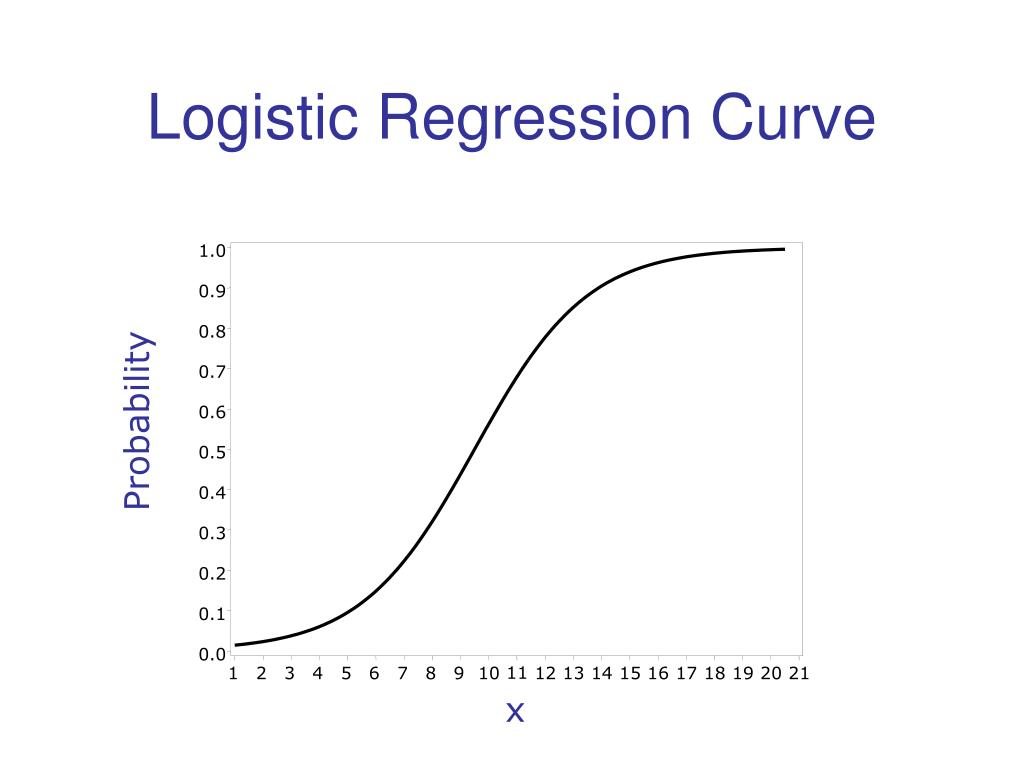

Note : If you want to know more about LogisticRegression click [here](https://www.ibm.com/topics/logistic-regression)

In [45]:
from sklearn.linear_model import LogisticRegression  # import LogisticRegression
from sklearn.pipeline import Pipeline                # import Pipeline
from sklearn.ensemble import RandomForestClassifier  # import RandomForestClassifier

In [46]:
# create a pipeline of one hot encodeing and LogisticRegression model
pipe = Pipeline(steps=[
    ('step1',transform),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [47]:
pipe.fit(x_train,y_train) # fit the train data into model

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('str',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [48]:
y_pred = pipe.predict(x_test) # predict on test data

In [49]:
from sklearn.metrics import accuracy_score # import accuracy
accuracy = accuracy_score(y_test,y_pred) # check accuracy on test data
print('Accuracy of the LogisticRegression model is - ',accuracy*100)

Accuracy of the LogisticRegression model is -  80.07568855561006


In [50]:
# create another pirpline for RandomForestClassifier
pipe2 = Pipeline(steps=[
    ('step1',transform),
    ('step2',RandomForestClassifier())
])

In [51]:
pipe2.fit(x_train,y_train) # Fit the data into RandomForestClassifier model

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('str',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [52]:
y_pred_rfc = pipe2.predict(x_test) # predict on test data using RandomForestClassifier model

In [53]:
accuracy_rfc = accuracy_score(y_test,y_pred_rfc) 
print('Accyracy of the RandomForestClassifier mdoel is - ',accuracy_rfc*100)  # accuracy check on test data

Accyracy of the RandomForestClassifier mdoel is -  99.92991800406476


In [54]:
teams # print teams name used in mdoel

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [55]:
delivery_df['city'].unique() # print city name used in model

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

# **Save Model**
>By using pickle library saved the model in .pkl format so, i can load this .pkl file again in vs code to use it in Web Application  

In [56]:
import pickle  # import pickle
pickle.dump(pipe,open('LR_pipe.pkl', 'wb'))  # LogisticRegression model save
pickle.dump(pipe2,open('RFC_pipe.pkl', 'wb')) # RandomForestClassifier mdoel save